In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("q3.ipynb")

# Qiskit Assignment 3
## Multiple Qubits, Entanglement, and Teleportation

### Learning Objectives
1. Understand the role of endianness in multi-qubit quantum circuits
2. Construct circuits with multiple qubits and entangled states
3. Solve a teleportation scenario

### Resources
Qiskit assignments are designed to be collaborative and open internet. Where possible, links to useful documentation will be embedded within questions. You're free to discuss these tasks with TAs and peers, but do write your own solutions. For some questions, there may be additional restrictions on the ways you can solve them. To ensure compliance with course policies and assignment instructions, we reserve the right to inspect your code.

**NAME**: Sam Schwartz

**STUDENT ID**: 488082

In [3]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_textbook.tools import array_to_latex
import matplotlib.pyplot as plt
import random
import numpy as np
import pprint

#### Task 1 - Endianness and Multi-Qubit Circuits (10 pts)

Qiskit uses a little endian convention for qubit ordering different from many textbooks and the lecture slides. Let's consider a circuit in the state $$\Psi=|0001\rangle$$

According to the convention used in lecture, the least significant qubit of the circuit, $q_0$, is in the state of the leftmost digit of $\Psi$, $|0\rangle$. In general, a state can be represented as $$|q_0,q_1,...,q_{n-1},q_n\rangle$$

Qiskit, however, interprets the rightmost digit, $|1\rangle$, as the state of the least significant qubit. This is the standard ordering of binary bitstrings, but it leads to a non-standard tensor product order ([source](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html#OpenQASM-backend)). Hence, the general form of the Qiskit ordering goes $$|q_n,q_{n-1},...,q_1,q_0\rangle$$

We want to utilize the power of Qiskit for building and running quantum circuits while also remaining consistent with our notation and tensor product math. For this class, we'll stick to the big endian ordering. Qiskit provides two functions that can help.

We can use the [`reverse_bits`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reverse_bits.html#qiskit.circuit.QuantumCircuit.reverse_bits) method to return a quantum circuit with qubit ordering flipped completely. Recall that we used this method in the first qiskit assignment.
- Pros: good for running a job and displaying the counts and/or histogram in big endian notation
- Cons: returns a new vertically flipped circuit which may be disorienting

We can also use the Statevector class's [`reverse_qargs`](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.reverse_qargs.html#qiskit-quantum-info-statevector-reverse-qargs) method to display the state of a multi-qubit circuit in big endian notation.
- Pros: preserves original form of the circuit
- Cons: not useful for displaying big endian counts in job results or a histogram

To check your understanding of qubit ordering in Qiskit, consider the following code which returns a circuit and its resulting statevector.
- modify the code such that `ket` is returned in big endian form without adding or modifying gates
- hints: 
 - what is the little endian state returned by the original code?
 - what is the corresponding big endian state?

In [71]:
def endianness():
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.x(1)
    ket = Statevector.from_instruction(qc)
    #qc.reverse_bits()
    ket = ket.reverse_qargs()
    return qc, ket

array_to_latex(endianness()[1], pretext="\\text{Task 1 SV} = ")

<IPython.core.display.Math object>

In [72]:
grader.check("Task 1")

Task 1 results: All test cases passed!

#### Task 2 (2A, 2B) - Multiple Qubit Circuits (30 pts)

#### Task 2A
- run the following cell
- return a circuit from `multi_qubit_a` that produces the following target state on measurement
- note:
 - it's fine if the resulting state is only equivalent up to a global phase
 - your qubits must start in $|00\rangle$ i.e. no initializations are allowed

In [54]:
array_to_latex([-1j/2, 1/2, -1/2, -1j/2], pretext="\\text{2A Target Statevector} = ")

<IPython.core.display.Math object>

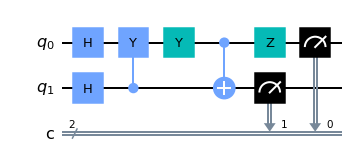

In [76]:
def multi_qubit_a():
    qc = QuantumCircuit(2,2);
    qc.h(0)
    qc.h(1)
    qc.cy(1,0)
    qc.y(0)
    qc.cx(0,1)
    qc.z(0)
    #qc.reverse_bits()
    qc.measure(0,0)
    qc.measure(1,1)
    return qc

multi_qubit_a().draw(output='mpl')

In [77]:
grader.check("Task 2A")

Task 2A results: All test cases passed!

#### Task 2B
- run the following cell
- return a circuit from `multi_qubit_b` that produces the following target state on measurement
- note:
 - it's okay if your resulting state is equivalent up to a global phase
 - your qubits must start in state $|00\rangle$ i.e. no initializations are allowed.

In [78]:
array_to_latex([1/(2**(.5)), 0, 0, -1/(2**(.5))], pretext="\\text{2B Target Statevector} = ")

<IPython.core.display.Math object>

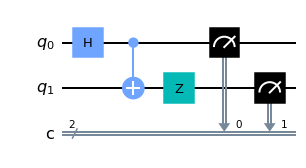

In [85]:
def multi_qubit_b():
    qc = QuantumCircuit(2,2);
    qc.h(0)
    qc.cx(0,1)
    qc.z(1)
    qc.measure(0,0)
    qc.measure(1,1)
    return qc
    
multi_qubit_b().draw(output='mpl')

In [86]:
grader.check("Task 2B")

Task 2B results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Task 3 (3A, 3B) - What's in the box? (30 pts)

For Tasks 3A and 3B, devise quantum circuitry around the box (i.e. outside the barriers) such that a measurement tells you the contents of the box, without fail.

You are given a quantum box with a gate in it.  There is a promise that it is one gate or the other.   Devise circuitry around the box so that with one measurement you are certain which of the two gates is in the box.

#### Task 3A

The oracle promises to be **I** or **Z**.

**README**: 
- Your solutions to 3A and 3B may not use conditional statements to dynamically pick gates according to the input or otherwise attempt to influence the oracle. In other words, the only gate that may vary between runs is the oracle. 
- Do not use the parameter `r` in any code you write. 
- Do not use initialize. You only need to add familiar gates to complete these tasks

Solutions not adhering to these guidelines will not receive credit. As usual, we reserve the right to manually inspect your code.

In [229]:
def oracle_a(qc, r=None):
    if r is None:
        r = random.uniform(0, 1)
    qc.id(0) if r > 0.5 else qc.z(0)
    return qc

def whats_in_box_a(r=None):
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.barrier()
    qc = oracle_a(qc,r)
    qc.barrier()
    qc.h(0)
    # if i in the box will stay the same since HIH = I, if z in the box will go to X gate since HZH = X
    qc.measure(0,0)
    return qc

Use the following cells to verify your implementation is working as expected. Do **not** modify the cells below, though you may run them as much as you'd like.

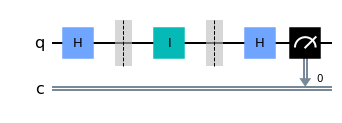

In [232]:
qc3a = whats_in_box_a()
qc3a.draw(output='mpl')

In [233]:
qc3a.remove_final_measurements()
array_to_latex(Statevector.from_instruction(qc3a).reverse_qargs(), pretext="\\text{3A last run} = ")

<IPython.core.display.Math object>

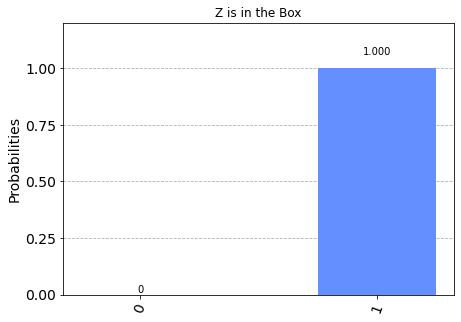

In [234]:
sim = BasicAer.get_backend("qasm_simulator")
job = execute(whats_in_box_a(.2), sim, shots=50)
counts = job.result().get_counts()
for state in ['0','1']:
    if state not in counts:
        counts[state] = 0
plot_histogram(counts, title="Z is in the Box")

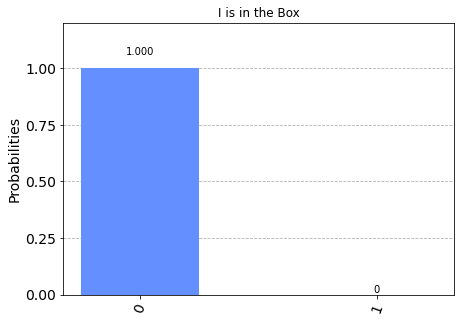

In [235]:
job = execute(whats_in_box_a(.7), sim, shots=50)
counts = job.result().get_counts()
for state in ['0','1']:
    if state not in counts:
        counts[state] = 0
plot_histogram(counts, title="I is in the Box")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Task 3B
The oracle promises to be **I**, **X**, **Y**, or **Z**.

Review the rules from 3A if it isn't clear what's allowed here.

In [264]:
def oracle_b(qc, r=None):
    if r is None:
        r = random.uniform(0, 1)
    if r < 0.25:
        qc.i(0)
        qc.i(1)
    elif r < 0.5:
        qc.x(0)
        qc.x(1)
    elif r < 0.75:
        qc.y(0)
        qc.y(1)
    else:
        qc.z(0)
        qc.z(1)
    return qc

def whats_in_box_b(r=None):
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.barrier()
    qc = oracle_b(qc,r)
    qc.barrier()
    #I = [1,0      X = [0,1    Y = [0,-i   Z = [1,0
    #     0,1]          1,0]        i,0]        0,-1]
    qc.h(0)
    qc.measure(0,0)
    qc.measure(1,1)
    return qc

Use the following cells to verify your implementation is working as expected. Do **not** modify the cells below, though you may run them as much as you'd like.

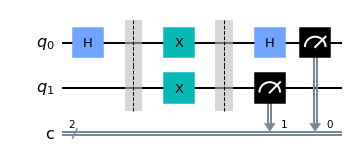

In [265]:
qc3b = whats_in_box_b()
qc3b.draw(output='mpl')

In [266]:
qc3b.remove_final_measurements()
array_to_latex(Statevector.from_instruction(qc3b).reverse_qargs(), pretext="\\text{3B last run} = ")

<IPython.core.display.Math object>

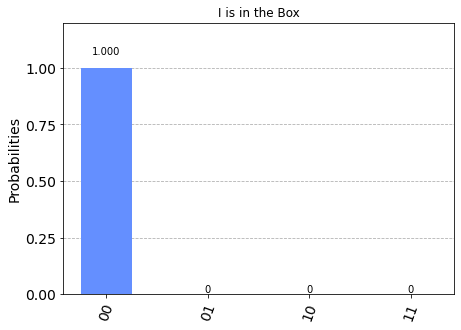

In [267]:
sim = BasicAer.get_backend("qasm_simulator")
job = execute(whats_in_box_b(.1).reverse_bits(), sim, shots=50)
counts = job.result().get_counts()
for state in ['00','01','10','11']:
    if state not in counts:
        counts[state] = 0
plot_histogram(counts, title="I is in the Box")

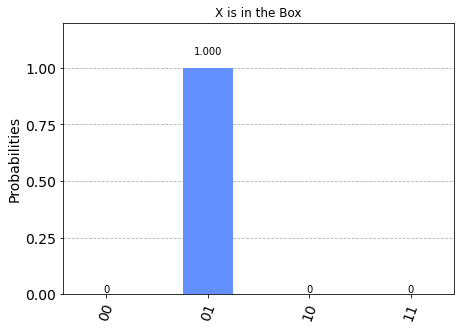

In [268]:
job = execute(whats_in_box_b(.3).reverse_bits(), sim, shots=50)
counts = job.result().get_counts()
for state in ['00','01','10','11']:
    if state not in counts:
        counts[state] = 0
plot_histogram(counts, title="X is in the Box")

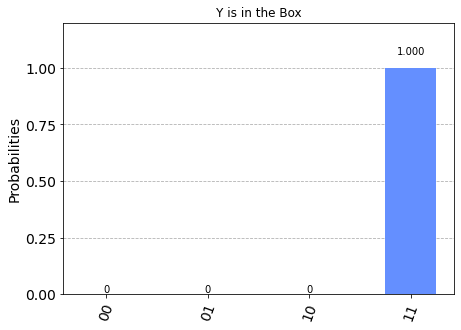

In [269]:
job = execute(whats_in_box_b(.6).reverse_bits(), sim, shots=50)
counts = job.result().get_counts()
for state in ['00','01','10','11']:
    if state not in counts:
        counts[state] = 0
plot_histogram(counts, title="Y is in the Box")

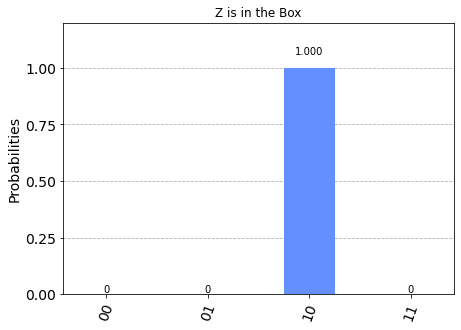

In [270]:
job = execute(whats_in_box_b(.9).reverse_bits(), sim, shots=50)
counts = job.result().get_counts()
for state in ['00','01','10','11']:
    if state not in counts:
        counts[state] = 0
plot_histogram(counts, title="Z is in the Box")

<!-- END QUESTION -->

#### Task 4 (4A, 4B) - Teleportation (30 pts)
In lecture 10, we discussed how states may be sent between Alice and Bob even when they are separated by an arbitrary distance using the power of teleportation...spooky!

We'll revisit that experiment. This time, we'll start with a different bell state. Specifically, the EPR pair will be created as $$|\Psi^+\rangle = \frac{|01\rangle+|10\rangle}{\sqrt{2}}$$. 

#### Task 4A
Given partial circuitry for teleportation, your task is to play the role of Bob and apply the correct transformations to recover the states sent by Alice. Fill in `bobs_operations` below with the logic necessary to recover Alice's teleported state.

Hints: 
- Use [Qiskit's c_if gate](https://qiskit.org/documentation/stubs/qiskit.circuit.Gate.c_if.html#qiskit-circuit-gate-c-if)
- You may reference [Qiskit's implementation](https://qiskit.org/textbook/ch-algorithms/teleportation.html) of standard teleportation

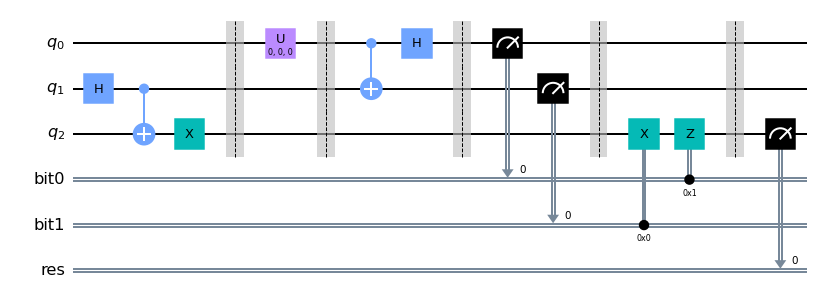

In [294]:
def teleport(u_gate_params=[0,0,0]):
    qr = QuantumRegister(3, name="q")
    bit0 = ClassicalRegister(1, name="bit0")
    bit1 = ClassicalRegister(1, name="bit1")
    res = ClassicalRegister(1, name="res")
    qc = QuantumCircuit(qr, bit0, bit1, res)
    # create EPR pair between Alice and Bob
    qc.h(1)
    qc.cx(1,2)
    qc.x(2)
    qc.barrier()
    # Alice prepares a state to teleport--assuming she doesn't know the parameters
    qc.u(*u_gate_params,0)
    qc.barrier()
    # Alice transforms for measurement
    qc.cx(0,1)
    qc.h(0)
    qc.barrier()
    # Alice performs measurements and sends values to Bob via classical channel
    qc.measure(0,0)
    qc.measure(1,1)
    qc.barrier()
    # Bob performs conditional operations based on classical bits
    qc = bobs_operations(qc)
    qc.barrier()
    # measure on Bob's transformed state
    qc.measure(2,2)
    return qc

def bobs_operations(qc):
    # here's the classical bits sent from Alice
    bit_0 = qc.cregs[0]
    bit_1 = qc.cregs[1]
    # you fill in the rest...
    qc.x(2).c_if(bit_1,0)
    qc.z(2).c_if(bit_0,1)
    
    return qc

teleport().draw(output='mpl')

In [295]:
grader.check("Task 4A")

Task 4A results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Task 4B
So your circuit passes the tests, but admittedly they are pretty weak. What fun is that? 

Let's take things a step further.
- create a teleportation instance where Bob is `25%` likely to measure the teleported state as $|1\rangle$
 - i.e. pass a list of 3 U gate parameters to the `teleport` function
- store your measurements in `counts` to interface with the provided code that creates a histogram showing the target ratio

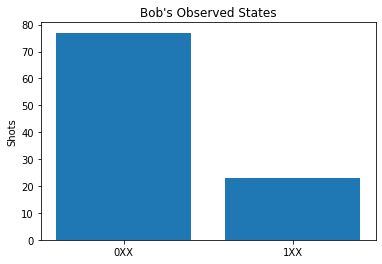

In [327]:
job = execute(teleport(u_gate_params= [np.pi/3,0,np.pi]), sim, shots=100)
counts = job.result().get_counts()


# no need to touch this...
zero = 0
one = 0
for k, v in counts.items():
    if int(k[0]) == 0:
        zero += v
    else:
        one += v 

y = np.arange(2)
plt.bar(y, [zero, one])
plt.ylabel("Shots")
plt.xticks(y, ["0XX", "1XX"])
plt.title("Bob's Observed States")
plt.show()

<!-- END QUESTION -->

That's enough for today :)

Next time: quantum games!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [328]:
grader.check_all()

Task 1 results: All test cases passed!

Task 2A results: All test cases passed!

Task 2B results: All test cases passed!

Task 4A results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [329]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)